In [3]:
import pandas as pd
import numpy as np

cols_to_use = list(range(2, 9)) + list(range(10, 14)) + list(range(15, 17)) + [20, 23, 26, 30, 38] + list(range(45, 48)) + [52, 58, 64, 105, 114, 137]
mydata = pd.read_csv('loan.csv', usecols=cols_to_use)
mydata[0:10]

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,total_pymnt,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,application_type,tot_cur_bal,total_bal_il,pub_rec_bankruptcies,sec_app_mort_acc,disbursement_method
0,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,...,167.02,Feb-2019,84.92,Mar-2019,Individual,16901.0,12560.0,1.0,NaN,Cash
1,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,...,1507.11,Feb-2019,777.23,Mar-2019,Individual,321915.0,87153.0,1.0,NaN,Cash
2,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,...,353.89,Feb-2019,180.69,Mar-2019,Individual,110299.0,7150.0,0.0,NaN,Cash
3,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,...,286.71,Feb-2019,146.51,Mar-2019,Individual,305049.0,30683.0,0.0,NaN,Cash
4,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,...,1423.21,Feb-2019,731.78,Mar-2019,Individual,116007.0,28845.0,0.0,NaN,Cash
5,5550,5550,5550.0,36 months,15.02,192.45,C,Director COE,10+ years,MORTGAGE,...,377.95,Feb-2019,192.45,Mar-2019,Individual,685749.0,131524.0,0.0,NaN,Cash
6,2000,2000,2000.0,36 months,17.97,72.28,D,Account Manager,4 years,RENT,...,141.56,Feb-2019,72.28,Mar-2019,Individual,854.0,0.0,0.0,NaN,Cash
7,6000,6000,6000.0,36 months,13.56,203.79,C,Assistant Director,10+ years,RENT,...,201.53,Feb-2019,208.31,Mar-2019,Individual,91535.0,53059.0,0.0,NaN,DirectPay
8,5000,5000,5000.0,36 months,17.97,180.69,D,Legal Assistant III,10+ years,MORTGAGE,...,353.89,Feb-2019,180.69,Mar-2019,Individual,41882.0,33864.0,0.0,NaN,Cash
9,6000,6000,6000.0,36 months,14.47,206.44,C,NaN,< 1 year,OWN,...,405.64,Feb-2019,206.44,Mar-2019,Individual,349502.0,39961.0,0.0,NaN,Cash


In [4]:
mydata['date'] = pd.to_datetime(mydata['issue_d'], format='%b-%Y')
new_data = mydata.loc[:,['loan_amnt']]
new_data = new_data.set_index(mydata['date'])
new_data[0:10]

,loan_amnt
date,
2018-12-01,2500
2018-12-01,30000
2018-12-01,5000
2018-12-01,4000
2018-12-01,30000
2018-12-01,5550
2018-12-01,2000
2018-12-01,6000
2018-12-01,5000


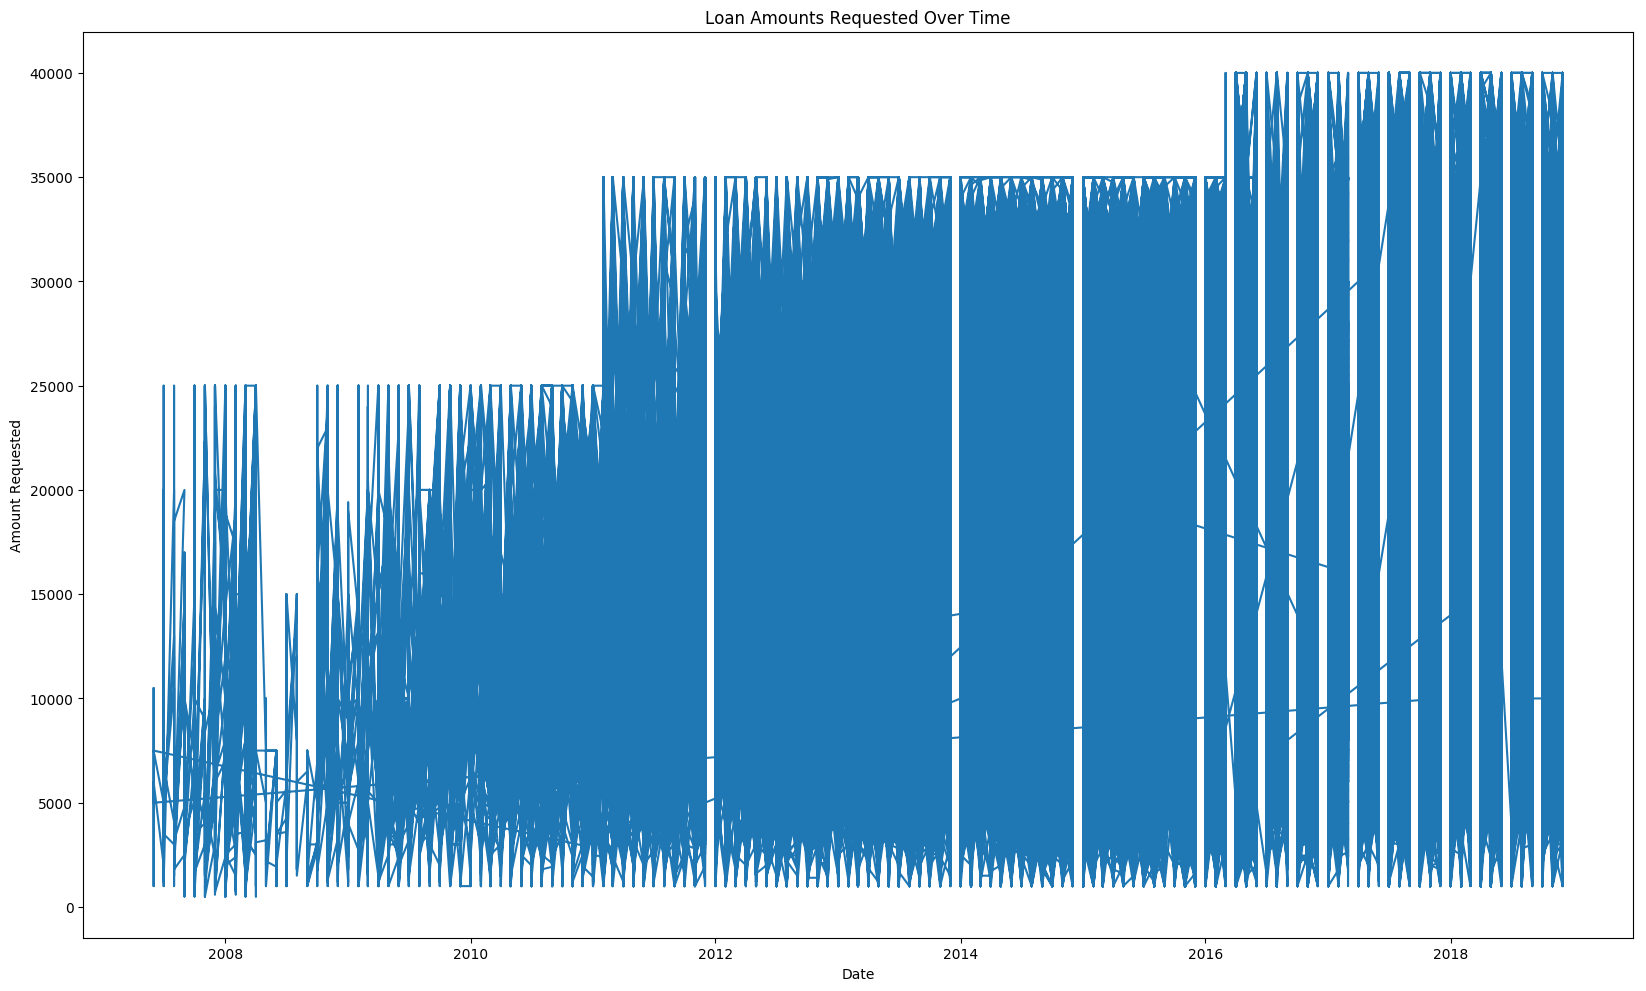

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 300000
plt.figure(figsize = (20,12), dpi = 100)
plt.plot(new_data.index, new_data['loan_amnt'])
plt.xlabel('Date')
plt.ylabel('Amount Requested')
plt.gca().set(title = 'Loan Amounts Requested Over Time')
plt.show()

Resample the data by month with the mean of funded amount of loan by investors during this period.

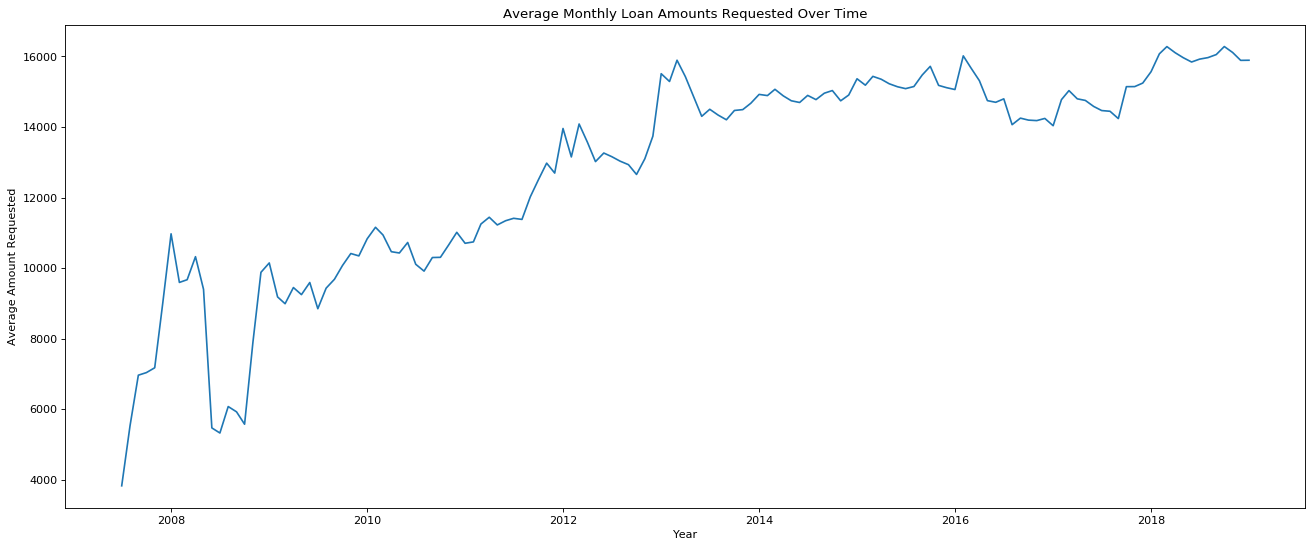

In [7]:
monthly = new_data.resample('M').mean()
plt.figure(figsize = (20,8), dpi = 80)
plt.plot(monthly.index, monthly['loan_amnt'], label = monthly.index)
plt.xlabel('Year')
plt.ylabel('Average Amount Requested')
plt.gca().set(title = 'Average Monthly Loan Amounts Requested Over Time')
plt.show()

In [8]:
monthly['month'] = [a.month for a in monthly.index]
monthly['year'] = [a.year for a in monthly.index]
years = monthly['year'].unique()

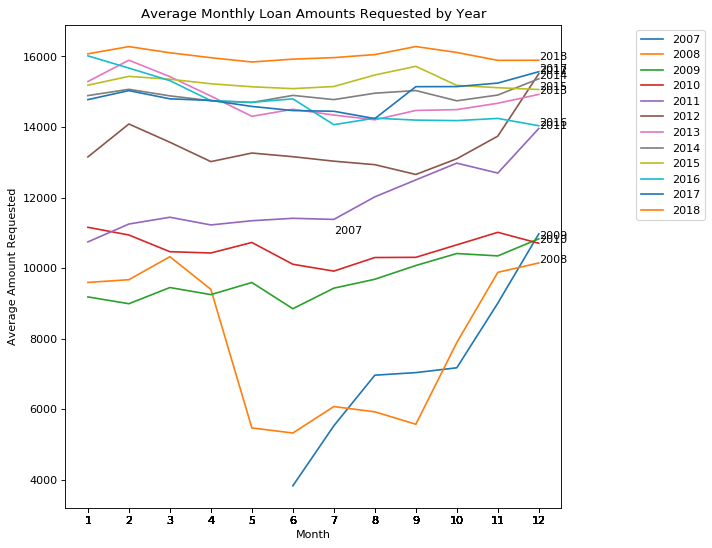

In [11]:
plt.figure(figsize = (8,8), dpi = 80)
for i, y in enumerate(years):      
    plt.plot('month', 'loan_amnt', data=monthly.loc[monthly.year == y, :], label= y)
    plt.text(monthly.loc[monthly.year==y, :].shape[0], monthly.loc[monthly.year==y, 'loan_amnt'][-1:].values[0], y)
plt.xticks(monthly.month)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.gca().set(title = 'Average Monthly Loan Amounts Requested by Year')
plt.xlabel('Month')
plt.ylabel('Average Amount Requested')
plt.show()

#Comment on the change of loans based on year

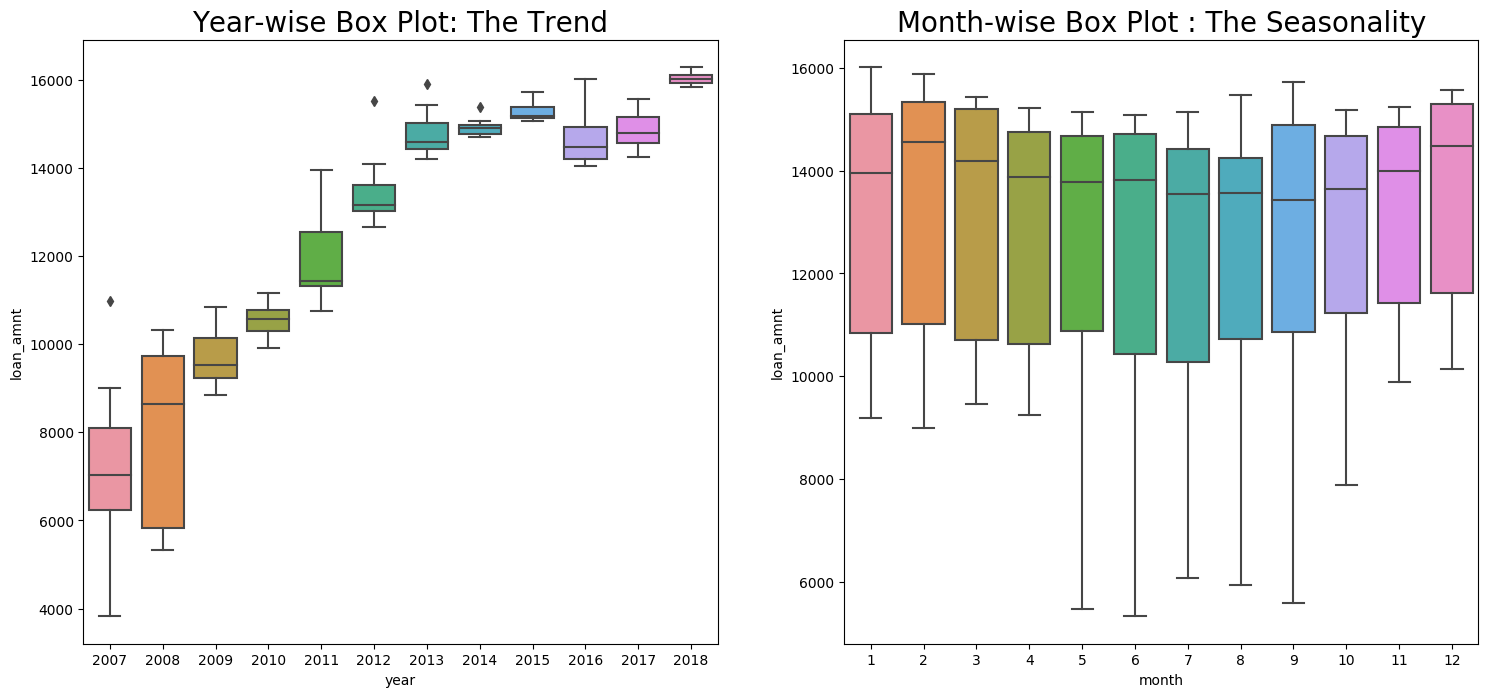

In [12]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(18,8), dpi= 100)
sns.boxplot(x = 'year', y = 'loan_amnt', data = monthly, ax = axes[0])
sns.boxplot(x = 'month', y = 'loan_amnt', data = monthly.loc[~monthly.year.isin([2007, 2018]), :])
axes[0].set_title('Year-wise Box Plot: The Trend', fontsize = 20)
axes[1].set_title('Month-wise Box Plot : The Seasonality', fontsize = 20)

plt.show()

Based on the Year-wise Box Plot above, we can see that the average amount of loan kept rising from 2007 to 2015, but then fell from 2015-2016 because: in 2015-2016, the Federal Reserve raised its loan interest rate up abount 0.25%, causing the people borrowing loans as well as the amount of loans decrease due to the investors. 
Moreover, the loan amount was given less starting in March based on the Month-weise Box Plot because the first interest rate increase was started in March.

CLASSCICAL DECOMPOSITION OF A TIME SERIES INTO ITS COMPONENT:

In [9]:
monthly.head()

,funded_amnt_inv,month,year
date,,,
2007-06-30,328.125000,6,2007
2007-07-31,1094.841270,7,2007
2007-08-31,1573.310811,8,2007
2007-09-30,1222.169811,9,2007
2007-10-31,1557.717730,10,2007


In [1]:
%load_ext rpy2.ipython

In [2]:
%%R -w 5 -h 5 --units in -r 200
#Credits to Professor Burman from STA 137

trend_seasonal= function(y,seas=1,lam=1,degtrnd=0){
      
# requires the R-package 'pracma'
  
# fits  a trend plus seasonal for the "best" Box-Cox 
# transformation.
  
# input: y, observed series; seas, seasons
  
# input: lam, the grid of Box-Cox transformations (lambda values)
  
# input: degtrnd, degree of the polynomial trend, if
# degtrnd=0, then the fitted trend is constant.
  
# output:  coef, regression coefficients - the
# first degtrnd+1 values for the trend part and the
# rest associated with the seasonals
  
# output: fit, fitted y-values; res, residuals,
  
# output: trend, fitted trend; season, fitted seasonals
  
# output: rsq, r-square values for different lambda in the
  
# output: lamopt, the value of lambda (among those supplied 
# in the vector lam) at which r-square is maximum.

m=length(lam)
n=length(y)

# Part of design matrix for estimating trend
if(degtrnd>0) {
   tm=seq(1/n,1,by=1/n) #use normalized time
   x1=poly(tm,degree=degtrnd,raw=TRUE) #generate the matrix of x
   x1=cbind(rep(1,n),x1)
   } else {
    x1=as.matrix(rep(1,n),ncol=1) #x matrix with only intercept
   }

# Part of design matrix for estimating seasonality
x2=NULL
if(seas>1){
sn=rep(1:seas,length.out=n)
x2=factor(sn,levels=unique(sn),ordered=TRUE)
x2=model.matrix(~x2-1) #matrix without the intercept
m2=ncol(x2)
m21=m2-1
x2=x2[,1:m21]-matrix(rep(x2[,m2],m21),ncol=m21,nrow=nrow(x2),byrow=FALSE) #include the negative ones
}

x=cbind(x1,x2)  # design matrix

xx=t(x)%*%x
rsq=rep(1,m) #empty vector of length m for computation of r squared of each transformation fit
m1=ncol(x1)     #degtrnd+1
m11=m1+1
mx=ncol(x)      # degtrnd+1+seas-1

for(i in 1:m) { #m is the length of lambda, do Boxcox transformation
  if (lam[i]==0) {
    yt=log(y)
  } else {
    yt=y^lam[i]
   }
  xy=t(x)%*%yt
  coef=solve(xx,xy)
  fit=x%*%coef #this is the trend and seasonal fit
  res=yt-fit
  ssto=(n-1)*var(yt)
  sse=t(res)%*%res
  rsq[i]=1-sse/ssto
  }

  ii=which.max(rsq) 
  lamopt=lam[ii]   #choose lambda optimal according to r squared
  if (lamopt==0) {
    yt=log(y)
  } else {
    yt=y^lamopt
   } #optimal transformation done ; yt
  xy=t(x)%*%yt
  coef=solve(xx,xy)
  fit=x%*%coef
  trnd=x1%*%coef[1:m1] #extract the trend part
  season=NULL
  if(seas>1){
  season=c(coef[m11:mx],-sum(coef[m11:mx]))
  #season = x2%*%coef[m11:mx]
  }
  res=yt-fit

  result=list(coef=coef,fit=fit,trend=trnd,res=res,season=season,rsq=rsq,lamopt=lamopt)
  return(result)
}

In [4]:
%%R -w 5 -h 5 --units in -r 200
library("data.table")
library(zoo)
mydata <- fread("loan.csv",sep=',', fill = FALSE, select = c(3,4,5,6,7,8,9,11,12,13,14,16,17,21,24,27,31,39,46,47,48,53,59,65,106,115,138))
mydata$new_date = format(as.Date(as.yearmon(mydata$issue_d, "%b-%Y")),"%Y-%m")
newdata = lapply(mydata, function(x) {aggregate(funded_amnt_inv ~ new_date, data = mydata, mean) })$new_date
newdata <- data.frame(newdata[,-1], row.names = newdata[,1])
head(newdata)
names(newdata) <- c("funded_amnt_inv")

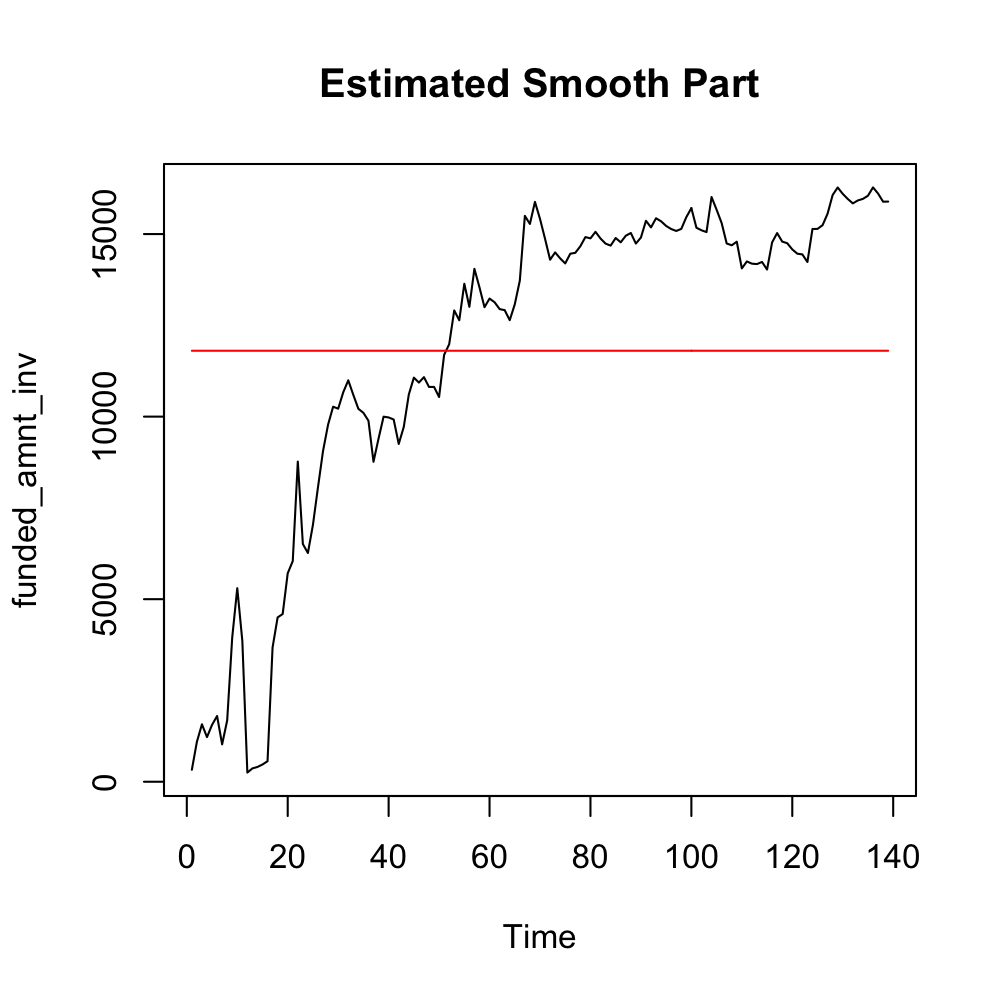

In [5]:
%%R -w 5 -h 5 --units in -r 200

fit_trend_sea = trend_seasonal(newdata$funded_amnt_inv, seas = 1, lam=1, degtrnd = 0)
rsq = fit_trend_sea$rsq
rsq
attributes(fit_trend_sea)
smooth.fit = fit_trend_sea$fit
plot.ts(newdata,main='Estimated Smooth Part')
points(smooth.fit,type='l',col='red')

<Figure size 1000x1000 with 0 Axes>

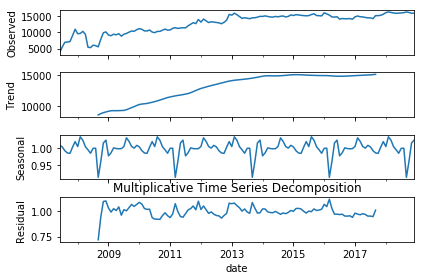

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Multiplicative Time Series Decomposition: 
plt.figure(figsize = (10,10), dpi = 100)
mul_ts = seasonal_decompose(monthly['loan_amnt'].loc[(monthly!=0).any(axis=1)], model='multiplicative', freq = 30)
mul_ts.plot()
plt.title('Multiplicative Time Series Decomposition')
plt.show()

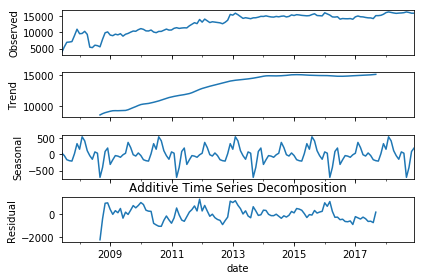

In [14]:
#Additive Time Series Decomposition: 
add_ts = seasonal_decompose(monthly['loan_amnt'].loc[(monthly!=0).any(axis=1)], model='additive', freq = 30)
add_ts.plot()
plt.title('Additive Time Series Decomposition')
plt.show()

We can see that a part of the trend was missing before the year of 2009. So I'll check the accuracy of the Time Series Decomposition with the year 2009 and later
If the actual value equals to the product of seasonal, trend, and residual then the time series decomposition works

In [15]:
mul_ts.seasonal.multiply(mul_ts.trend).multiply(mul_ts.resid)[monthly.year > 2008].head()

date
2009-01-31    9182.620818
2009-02-28    8989.817881
2009-03-31    9448.456790
2009-04-30    9247.672673
2009-05-31    9591.364903
Freq: M, Name: loan_amnt, dtype: float64

In [16]:
mul_ts.observed[monthly.year >2008].head()

date
2009-01-31    9182.620818
2009-02-28    8989.817881
2009-03-31    9448.456790
2009-04-30    9247.672673
2009-05-31    9591.364903
Freq: M, Name: loan_amnt, dtype: float64

Therefore, we can see that the Time Series Decomposition is correct for extracting each components (Trend, Seasonality, Residuals).

CHECKING IF THE TIME SERIES IS STATIONARY OR NOT: (Using the Augmented Dickey Fuller Test (ADF):)

Null Hypothesis: The time series is not stationary, has a unit root, and has time dependent structure. <br> 
Alternative Hypothesis: The time series is  stationary, doesn't have a unit root, and doesn't have time dependent structure. <br> 
Rejection Region: If the p-value is <= the significance level (use alpha = 0.05), then we reject the null hypothesis.

In [43]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(monthly['loan_amnt'], autolag='AIC')
adf_statistic = adf_test[0]
adf_p_value = adf_test[1]
print('ADF Statistic = %f' %adf_statistic)
print('p-value = %f' %adf_p_value)

ADF Statistic = -1.235315
p-value = 0.658223


Since the p-value is less than 0.05 significance level, we reject the null hypothesis. Therefore, the time series above is stationary.

TEST THE SEASONALITY OF THE TIME SERIES:

Plotting the time series and checking the patterns in a fixed time interval is the fastest way to test the seasonality of the time series. Using the Autocorrelation Function (ACF) Plot, we can check if there a seasonal pattern by checking the multiple spikes at the specific lag(line), this can help us determine if it's the monthly, weekly, or yearly time series.

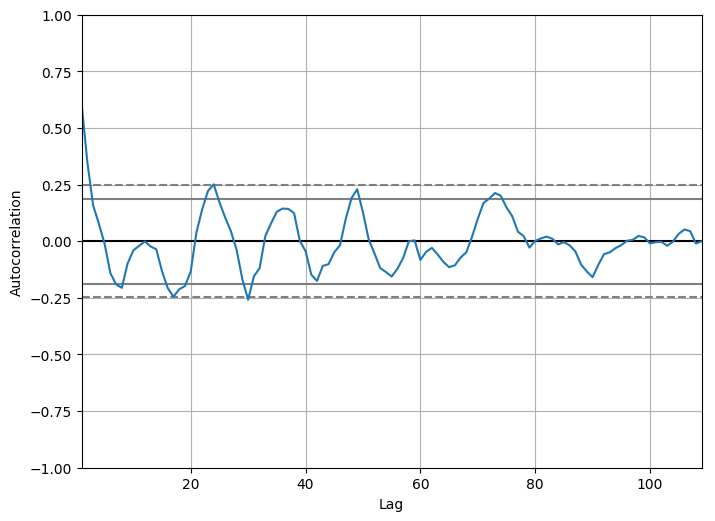

In [39]:
from pandas.plotting import autocorrelation_plot

res = add_ts.resid[-pd.isnull(add_ts.resid)];
plt.figure(figsize = (8,6), dpi = 100)
autocorrelation_plot(res.tolist())

Based on the ACF plot above, we can notice the repeated pattern that has multiple downard spikes at lag 12, 24, 36, 48, .... This means that the amount of loans funded by the investors is the monthly time series with patterns repeating every year.

CALCULATE THE ACF AND PACF OF THE TIME SERIES:

In [40]:
from statsmodels.tsa.stattools import acf, pacf

#Calculate the ACF and PACF with 50 lags
print('The ACF values using 50 lags:')
print(acf(res, nlags=50))
print('The PACF values using 50 lags:')
print(pacf(res, nlags=50))

The ACF values using 50 lags:
[ 1.00000000e+00  6.04834843e-01  3.47482963e-01  1.58684787e-01
  7.72090372e-02 -1.14949053e-02 -1.40650956e-01 -1.90439262e-01
 -2.05870846e-01 -9.87956833e-02 -4.02705797e-02 -2.05806751e-02
 -8.59242160e-04 -2.28125902e-02 -3.55481314e-02 -1.32963237e-01
 -2.07097865e-01 -2.44949787e-01 -2.11903172e-01 -1.97973682e-01
 -1.33472819e-01  3.97998051e-02  1.40759626e-01  2.21449382e-01
  2.51287905e-01  1.72426114e-01  1.04787293e-01  4.38196967e-02
 -3.88397936e-02 -1.68714979e-01 -2.58347369e-01 -1.54977509e-01
 -1.19156443e-01  2.36626367e-02  7.91411048e-02  1.30261694e-01
  1.44178811e-01  1.42706384e-01  1.24173999e-01  1.86190508e-03
 -4.35207420e-02 -1.47564233e-01 -1.74975164e-01 -1.09349754e-01
 -1.01357326e-01 -4.88660095e-02 -1.77472957e-02  9.79051581e-02
  1.89595721e-01  2.29893518e-01  1.27080437e-01]
The PACF values using 50 lags:
[ 1.          0.61043517 -0.0297323  -0.06569676  0.02228701 -0.0795777
 -0.17069728 -0.03622606 -0.053227   

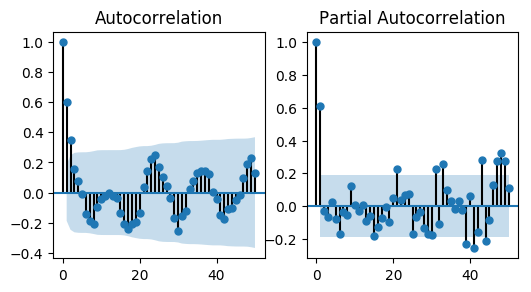

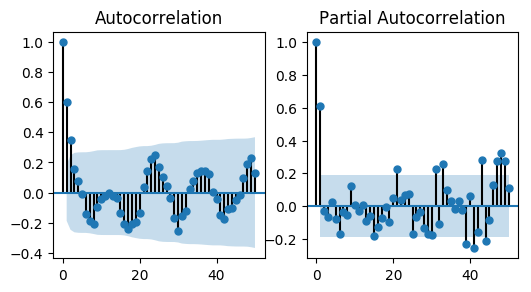

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize = (6,3), dpi= 100)
plot_acf(res.tolist(), lags=50, ax=axes[0])
plot_pacf(res.tolist(), lags=50, ax=axes[1])

Based on the ACF plot above, we can we both the pattern in both plots, indicating that the series is significantly correlated. This can help predicting the current value using the previous values of the series.